## Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


## Setting up working directory

In [3]:
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/Semester 2/CDS/CDS Assignment/Assignment 3

C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\CDS Assignment\Assignment 3


## Reading the excel file

In [4]:
data = pd.read_excel('Real estate valuation data set.xlsx')

## Some info about the file

In [5]:
print('Dimension of the data = ',data.shape)

Dimension of the data =  (414, 8)


In [7]:
# Counting Null values per column
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

##### Attribute Information:

##### X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
##### X2=the house age (unit: year)
##### X3=the distance to the nearest MRT station (unit: meter)
##### X4=the number of convenience stores in the living circle on foot (integer)
##### X5=the geographic coordinate, latitude. (unit: degree)
##### X6=the geographic coordinate, longitude. (unit: degree)
##### Y= house price of unit area

## Let us discard Latitude and Longitude and transaction Date

In [6]:
df = data.drop(['No',
                'X1 transaction date',
                'X5 latitude',
                'X6 longitude'],axis =1) # Dropping those columns

## Renaming the existing columns in the new data frame df

In [11]:
df.rename({'X2 house age': 'house age', 
           'X3 distance to the nearest MRT station': 'distance to the MRT station',
          'X4 number of convenience stores': 'number of convenience stores',
          'Y house price of unit area':'house price of unit area'}, axis=1, inplace=True)

## Final Data Set

In [12]:
df

,house age,distance to the MRT station,number of convenience stores,house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


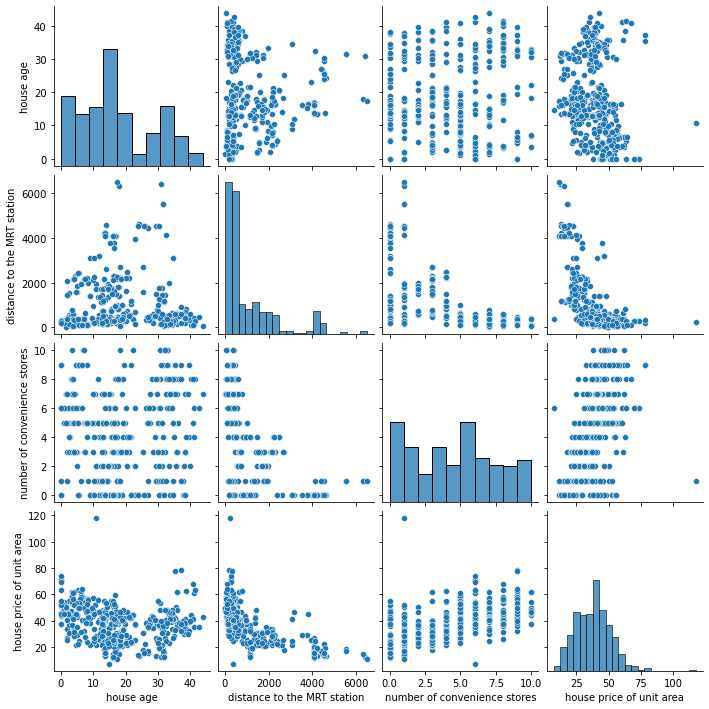

In [13]:
import seaborn as sn
sn.pairplot(df)

## Converting the dataframe into two numpy arrays

In [27]:
df.columns

Index(['house age', 'distance to the MRT station',
       'number of convenience stores', 'house price of unit area'],
      dtype='object')

In [14]:
X = np.array(df[['house age', 
                 'distance to the MRT station']])
y = np.array(df['house price of unit area'])

## Spiliting the data into train set and test set

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Ordinary Least Squares

In [16]:
%matplotlib inline

In [17]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              176.0
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                    1.31e-50
Time:                        13:52:18   Log-Likelihood:                         -1362.5
No. Observations:                 289   AIC:                                      2729.
Df Residuals:                     287   BIC:                                      2736.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
print("Analytically computing the parameters:")
print(np.linalg.inv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:
[1.38480694e+00 1.18632372e-03]


In [19]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("R_squared value: ", res.rsquared)
print("Testing Accuracy:{}".format(r2_score(res.predict(X_test), y_test)))

Parameters:  [1.38480694e+00 1.18632372e-03]
Standard errors:  [0.09334997 0.00114579]
R_squared value:  0.5508596144439037
Testing Accuracy:-1.5696288484981733


In [26]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
  

X_train:(289, 2)
y_train:(289,)
Iteration: 0, Cost: 806.491
Iteration: 1, Cost: 791.456
Iteration: 2, Cost: 776.720
Iteration: 3, Cost: 762.279
Iteration: 4, Cost: 748.125
Iteration: 5, Cost: 734.253
Iteration: 6, Cost: 720.657
Iteration: 7, Cost: 707.333
Iteration: 8, Cost: 694.274
Iteration: 9, Cost: 681.475
Iteration: 10, Cost: 668.931
Iteration: 11, Cost: 656.637
Iteration: 12, Cost: 644.588
Iteration: 13, Cost: 632.779
Iteration: 14, Cost: 621.205
Iteration: 15, Cost: 609.862
Iteration: 16, Cost: 598.745
Iteration: 17, Cost: 587.850
Iteration: 18, Cost: 577.171
Iteration: 19, Cost: 566.706
Iteration: 20, Cost: 556.448
Iteration: 21, Cost: 546.396
Iteration: 22, Cost: 536.543
Iteration: 23, Cost: 526.887
Iteration: 24, Cost: 517.423
Iteration: 25, Cost: 508.148
Iteration: 26, Cost: 499.058
Iteration: 27, Cost: 490.148
Iteration: 28, Cost: 481.416
Iteration: 29, Cost: 472.859
Iteration: 30, Cost: 464.471
Iteration: 31, Cost: 456.251
Iteration: 32, Cost: 448.195
Iteration: 33, Cost: 

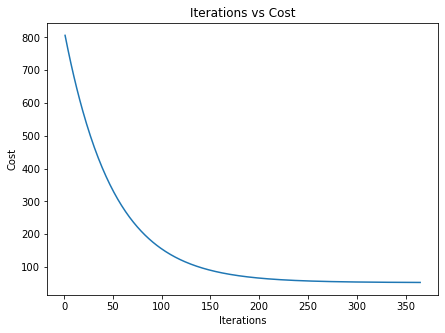

In [24]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=True)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

X_train:(289, 2)
y_train:(289,)
Iteration: 0, Cost: 808.217
Iteration: 1, Cost: 793.210
Iteration: 2, Cost: 778.502
Iteration: 3, Cost: 764.085
Iteration: 4, Cost: 749.954
Iteration: 5, Cost: 736.104
Iteration: 6, Cost: 722.528
Iteration: 7, Cost: 709.222
Iteration: 8, Cost: 696.180
Iteration: 9, Cost: 683.396
Iteration: 10, Cost: 670.866
Iteration: 11, Cost: 658.585
Iteration: 12, Cost: 646.548
Iteration: 13, Cost: 634.749
Iteration: 14, Cost: 623.185
Iteration: 15, Cost: 611.850
Iteration: 16, Cost: 600.740
Iteration: 17, Cost: 589.850
Iteration: 18, Cost: 579.176
Iteration: 19, Cost: 568.714
Iteration: 20, Cost: 558.460
Iteration: 21, Cost: 548.409
Iteration: 22, Cost: 538.558
Iteration: 23, Cost: 528.902
Iteration: 24, Cost: 519.438
Iteration: 25, Cost: 510.161
Iteration: 26, Cost: 501.069
Iteration: 27, Cost: 492.157
Iteration: 28, Cost: 483.421
Iteration: 29, Cost: 474.859
Iteration: 30, Cost: 466.467
Iteration: 31, Cost: 458.242
Iteration: 32, Cost: 450.179
Iteration: 33, Cost: 

Iteration: 292, Cost: 54.054
Iteration: 293, Cost: 54.011
Iteration: 294, Cost: 53.968
Iteration: 295, Cost: 53.927
Iteration: 296, Cost: 53.886
Iteration: 297, Cost: 53.847
Iteration: 298, Cost: 53.807
Iteration: 299, Cost: 53.769
Iteration: 300, Cost: 53.732
Iteration: 301, Cost: 53.695
Iteration: 302, Cost: 53.659
Iteration: 303, Cost: 53.624
Iteration: 304, Cost: 53.589
Iteration: 305, Cost: 53.555
Iteration: 306, Cost: 53.522
Iteration: 307, Cost: 53.489
Iteration: 308, Cost: 53.457
Iteration: 309, Cost: 53.426
Iteration: 310, Cost: 53.395
Iteration: 311, Cost: 53.365
Iteration: 312, Cost: 53.336
Iteration: 313, Cost: 53.307
Iteration: 314, Cost: 53.278
Iteration: 315, Cost: 53.251
Iteration: 316, Cost: 53.223
Iteration: 317, Cost: 53.197
Iteration: 318, Cost: 53.171
Iteration: 319, Cost: 53.145
Iteration: 320, Cost: 53.120
Iteration: 321, Cost: 53.095
Iteration: 322, Cost: 53.071
Iteration: 323, Cost: 53.047
Iteration: 324, Cost: 53.024
Iteration: 325, Cost: 53.002
Iteration: 326

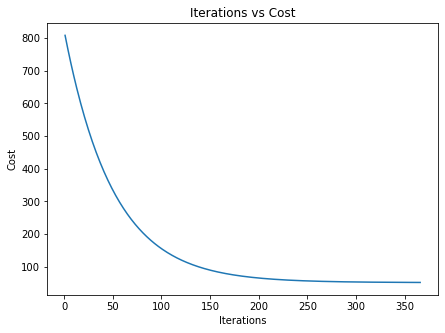

In [25]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=True)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()